## Análise de vendas de video games

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv("data/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Descobrindo valores nulos em cada coluna:
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#Visão geral de tipos, nulos e valores únicos
visao_geral = pd.DataFrame({
    "tipo":df.dtypes,
    "nulos":df.isnull().sum(),
    "valores_unicos":df.nunique()
})

In [6]:
# Descobrindo valores únicos da coluna Genre
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [7]:
# Criando uma nova coluna de década
df["Decade"] = 0

In [8]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0


In [9]:
# Exibindo apenas os nulos da coluna Year
df[df["Year"] % 1 != 0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,0
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,0
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,0
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,0
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,0
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,0
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,0
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01,0


#### Removendo dados nulos

A quantidade de dados nulos presente na coluna Year e Publisher representam uma porcentagem baixissíma no dataset. 

* Year => 1.63% de nulos 
* Publisher => 0.22% de nulos

Desse modo, eu optei por removê-los, garantindo a integridade dos dados.

In [10]:
# Descobrindo a porcentagem de nulos na coluna Year
coluna_year_nulos = (df["Year"].isna().sum() / len(df)) * 100
print(f"Porcentagem de dados nulos na coluna Year: {coluna_year_nulos:.2f}%")

Porcentagem de dados nulos na coluna Year: 1.63%


In [11]:
# Removendo dados nulos da coluna Year
df = df.dropna(subset="Year")

In [12]:
# Conferindo se ainda existem nulos
df["Year"].isnull().sum()

np.int64(0)

In [13]:
# Descobrindo a porcentagem de nulos na coluna Publisher
coluna_publisher_nulos = (df["Publisher"].isna().sum() / len(df)) * 100

print(f"Porcentagem de dados nulos na coluna Publisher: {coluna_publisher_nulos:.2f}%")


Porcentagem de dados nulos na coluna Publisher: 0.22%


In [14]:
# Removendo dados nulos da coluna Year
df = df.dropna(subset="Publisher")

In [15]:
# Conferindo se ainda existem nulos
df["Publisher"].isnull().sum()

np.int64(0)

In [16]:
df.shape

(16291, 12)

#### Atribuindo valores para a coluna Decade

In [17]:
# Descobrindo o ano mais antigo para o mais recente
df["Year"].max(), df["Year"].min()

(np.float64(2020.0), np.float64(1980.0))

In [18]:
df["Decade"] = (df["Year"] // 10 * 10).astype(int).astype(str) + "s"

#### Estatíticas básicas

In [19]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s


In [20]:
# Quantidade de jogos por década:

df["Decade"].value_counts().sort_index()

Decade
1980s     205
1990s    1769
2000s    9183
2010s    5133
2020s       1
Name: count, dtype: int64

In [21]:
# Média de venda por região
df[["NA_Sales","EU_Sales","JP_Sales"]].mean().round(2)


NA_Sales    0.27
EU_Sales    0.15
JP_Sales    0.08
dtype: float64

In [22]:
# Desvio padrão das vendas globais
df["Global_Sales"].std().round(2)


#A maioria dos jogos vende perto da média (digamos, algo como 0,5 a 1 milhão).

#Mas há uma dispersão considerável, o que indica que existem títulos fora da curva — blockbusters que vendem dezenas de milhões e puxam a média pra cima.

np.float64(1.57)

## Gráficos

#### Vendas globais por ano

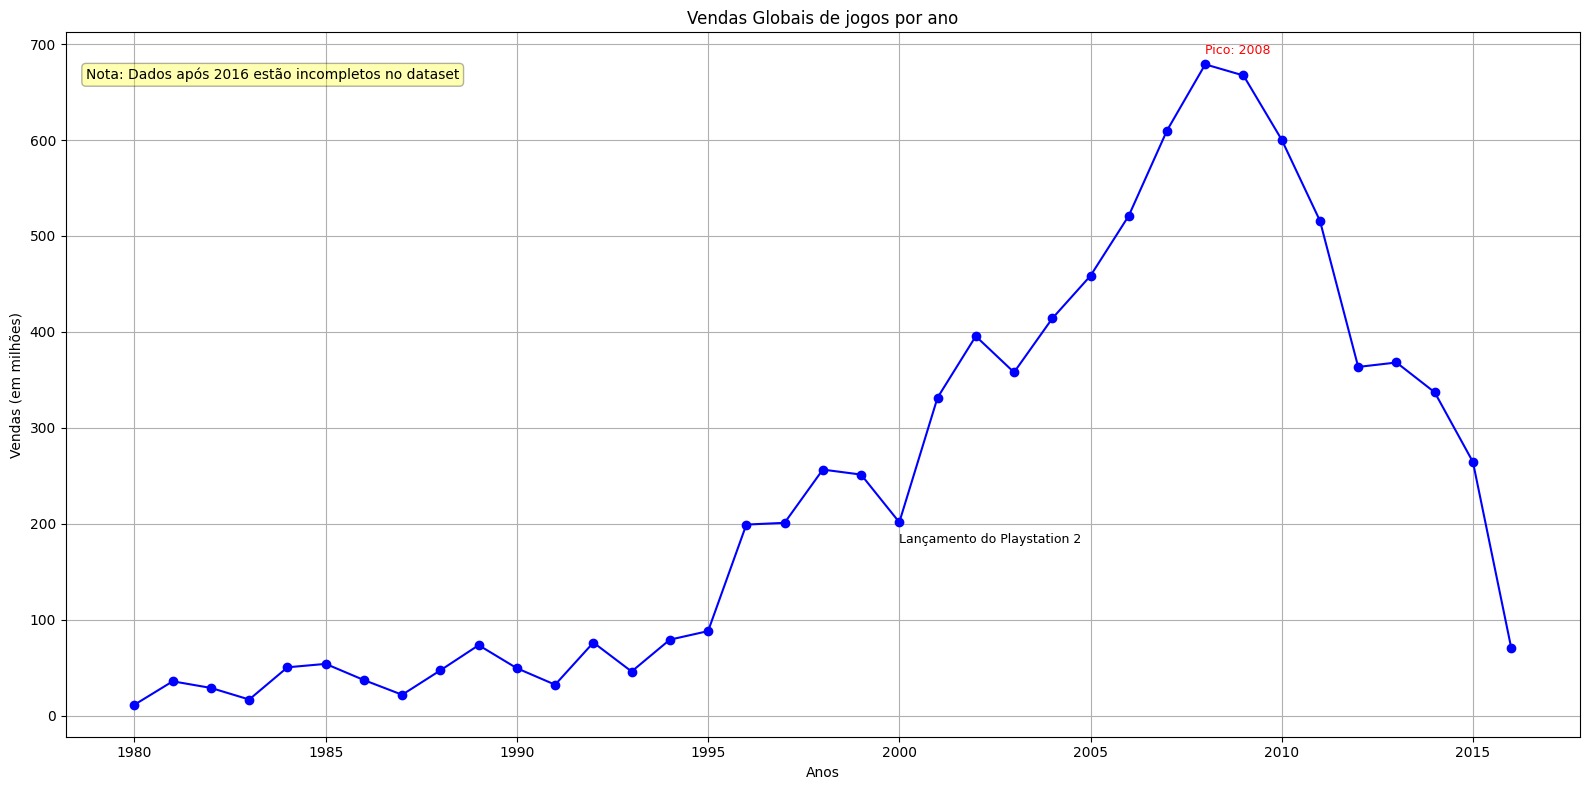

In [23]:
vendas_anos = df.groupby("Year")["Global_Sales"].sum()
vendas_anos = vendas_anos[vendas_anos.index <= 2016]

ano_melhor_vendas = vendas_anos.idxmax() #ano
venda_maxima = vendas_anos.max() #valor

plt.figure(figsize=(16,8))
plt.plot(vendas_anos.index, vendas_anos.values, marker='o', linestyle='-', color='b')

plt.title("Vendas Globais de jogos por ano")
plt.xlabel("Anos")
plt.ylabel("Vendas (em milhões)")
plt.grid(True)

plt.text(0.26, 0.95, "Nota: Dados após 2016 estão incompletos no dataset",
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment="top",
         horizontalalignment="right",
         bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.3))
plt.text(2000, 
         190, 
         "Lançamento do Playstation 2", 
         fontsize=9,
         verticalalignment="top",
         horizontalalignment="left",)
plt.annotate(f"Pico: {int(ano_melhor_vendas)}",
             xy=(2008, 700),
             xytext=(2008, 690),
             fontsize=9,
             color="red",
             ha="left")

plt.tight_layout()
plt.show()

* O avanço tecnológico dos consoles, com o lançamento do Playstation 2, Nintendo DS e Nintendo Wii contribuíram para a era de ouro dos videogames

#### Gênero mais vendido globalmente

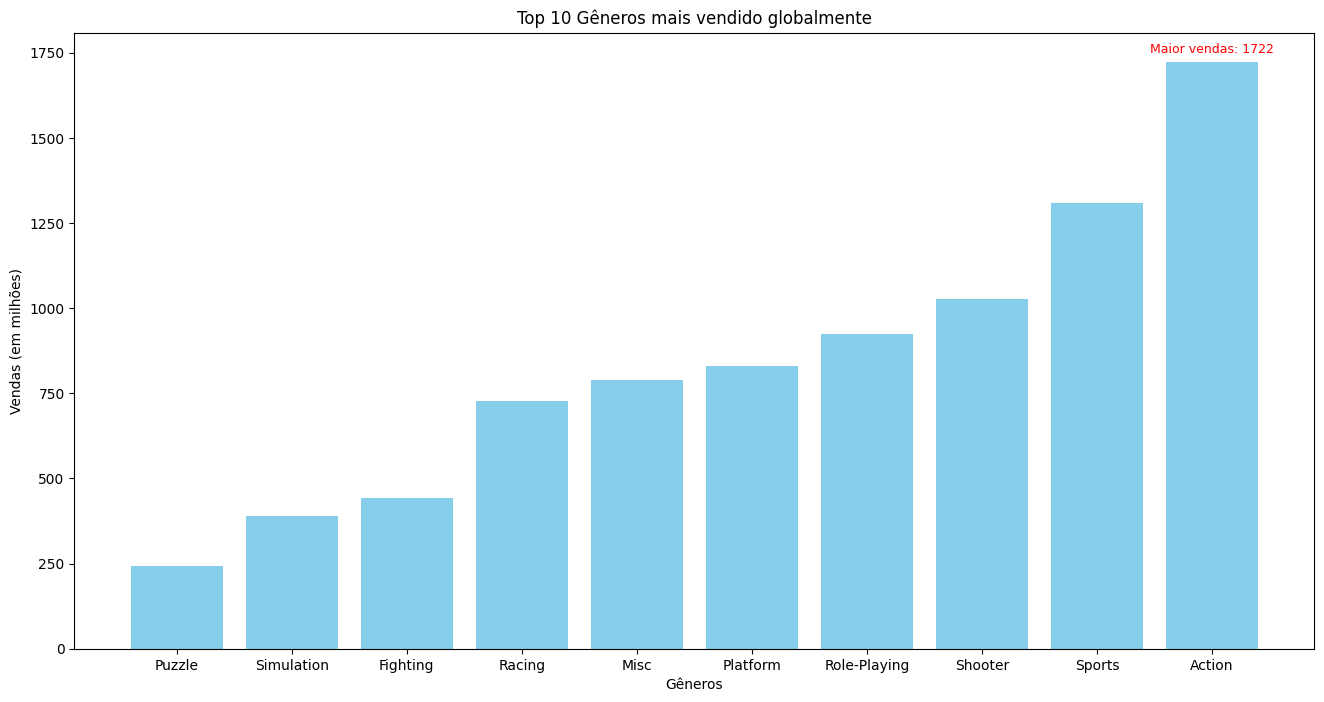

In [24]:
vendas_genero = df.groupby("Genre")["Global_Sales"].sum().nlargest(10)
genero_mais_vendido = vendas_genero.max()

vendas_genero = vendas_genero.sort_values()

plt.figure(figsize=(16,8))
plt.bar(vendas_genero.index, vendas_genero.values, color="skyblue")
plt.title("Top 10 Gêneros mais vendido globalmente")
plt.annotate(f"Maior vendas: {int(genero_mais_vendido)}",
             xy=("Action", 1750),
             xytext=("Action", 1750),
             fontsize=9,
             color="red",
             ha="center")
plt.xlabel("Gêneros")
plt.ylabel("Vendas (em milhões)")
plt.show()

* O gênero ação foi o mais vendido com 1.7 bilhões de jogos já vendidos com esse gênero

#### Vendas totais por plataforma

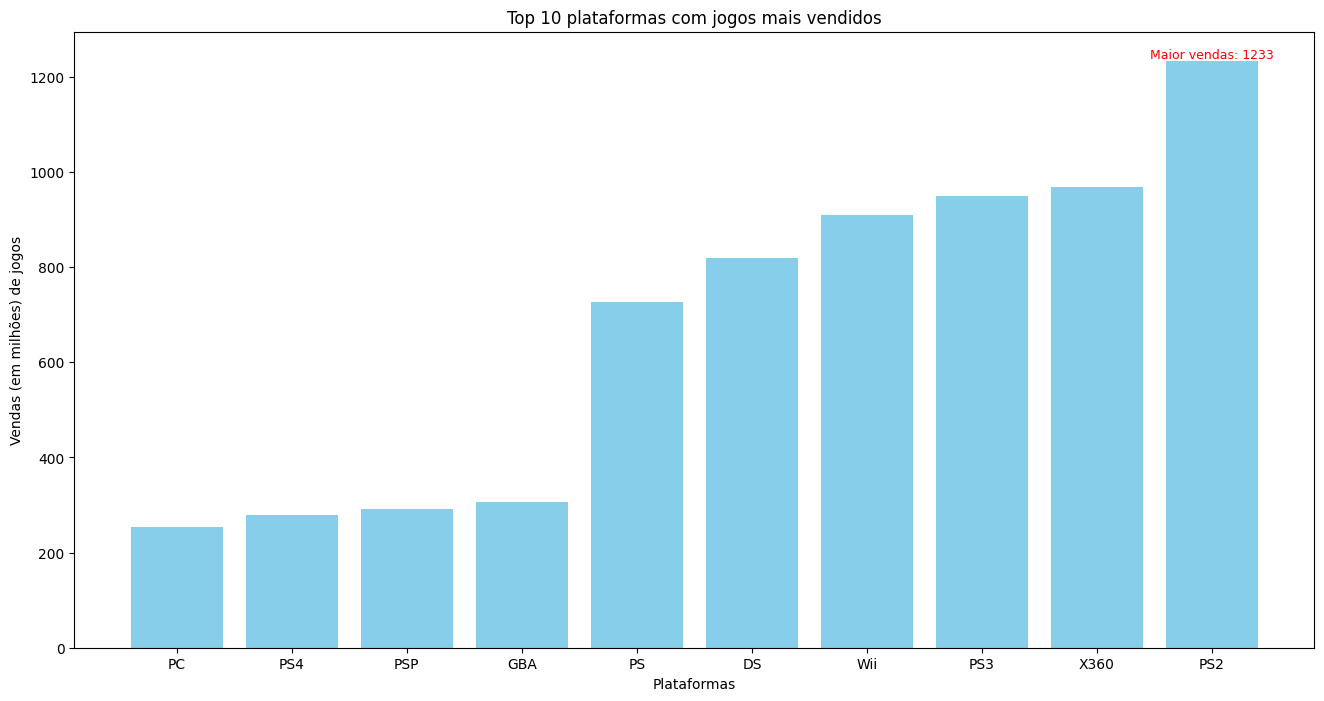

In [25]:
vendas_plataformas = df.groupby("Platform")["Global_Sales"].sum().nlargest(10)
plataforma_com_jogos_mais_vendidos = vendas_plataformas.max()

vendas_plataformas = vendas_plataformas.sort_values()

plt.figure(figsize=(16,8))
plt.bar(vendas_plataformas.index, vendas_plataformas.values, color="skyblue")
plt.title("Top 10 plataformas com jogos mais vendidos")
plt.annotate(f"Maior vendas: {int(plataforma_com_jogos_mais_vendidos)}",
             xy=("PS2", 1240),
             xytext=("PS2", 1240),
             fontsize=9,
             color="red",
             ha="center")
plt.xlabel("Plataformas")
plt.ylabel("Vendas (em milhões) de jogos")
plt.show()


* Consoles posteriores ao Playstation 2 não superaram seu máximo de vendas

#### Publishers mais famosas

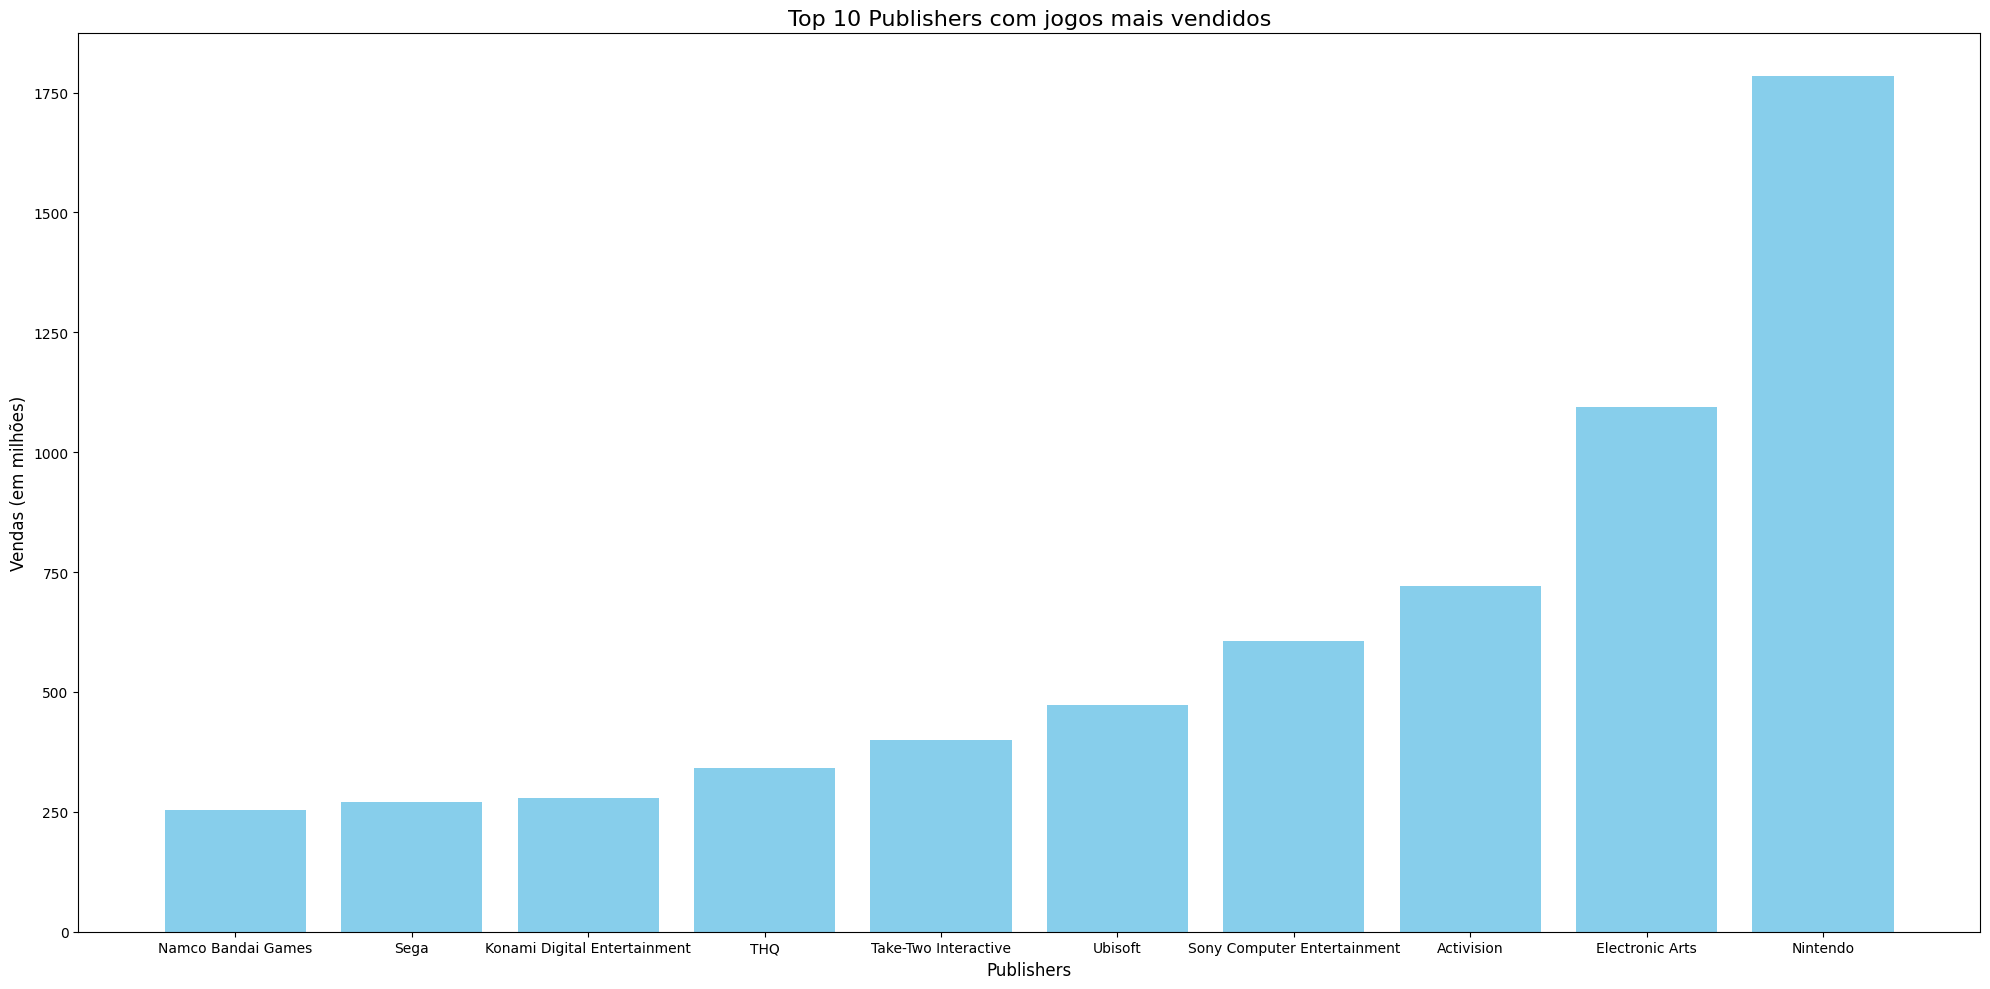

In [30]:
vendas_publishers = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10)
vendas_publishers = vendas_publishers.sort_values()

plt.figure(figsize=(20,10))
plt.bar(vendas_publishers.index, vendas_publishers.values, color="skyblue")
plt.title("Top 10 Publishers com jogos mais vendidos", fontsize=16)
plt.xlabel("Publishers", fontsize=12)
plt.ylabel("Vendas (em milhões)", fontsize=12)
plt.tight_layout()
plt.show()


#### Vendas regionais

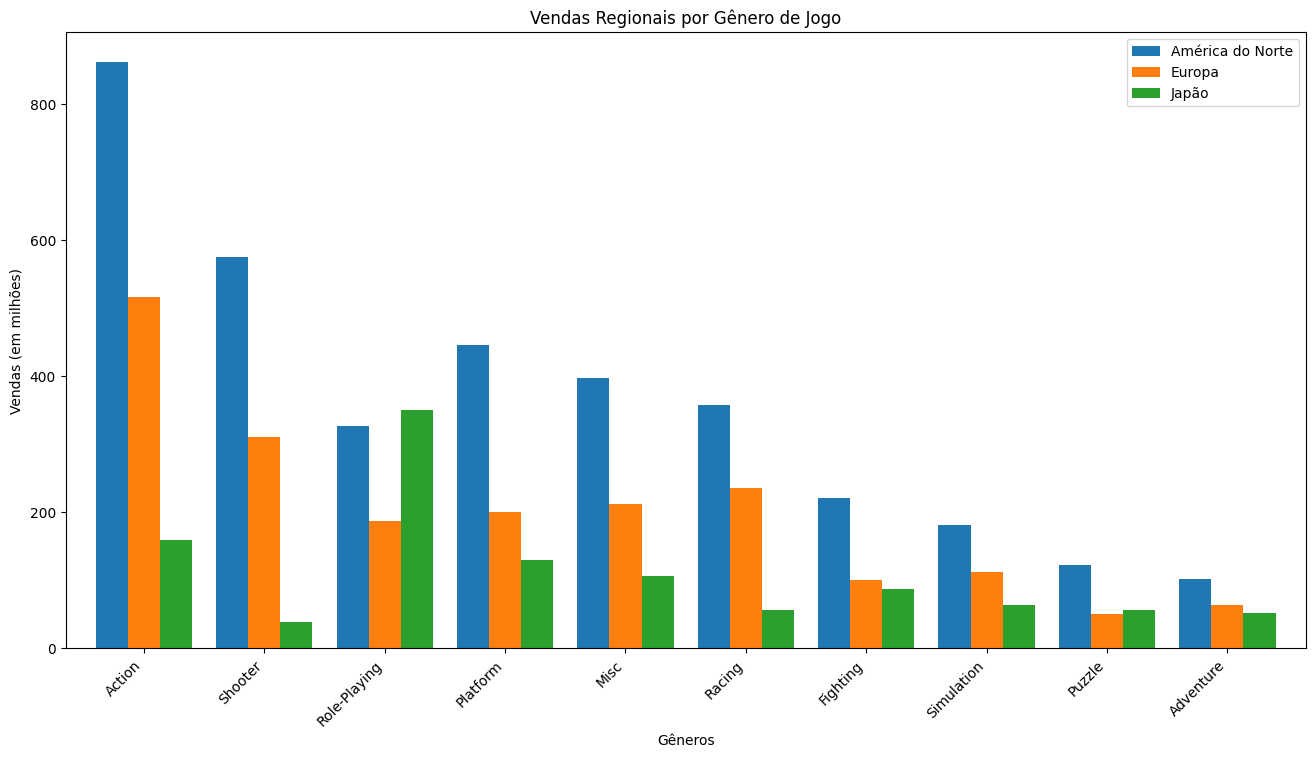

In [27]:
vendas_regionais = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]].sum().head(10)

vendas_regionais["Total_Regional"] = vendas_regionais.sum(axis=1)
vendas_regionais_ordenadas = vendas_regionais.sort_values(by="Total_Regional", ascending=False).drop(columns="Total_Regional")

vendas_regionais_plot = vendas_regionais_ordenadas.rename(columns={
    "NA_Sales":"América do Norte",
    "EU_Sales":"Europa",
    "JP_Sales":"Japão"
})

ax = vendas_regionais_plot.plot(kind="bar",
                                     figsize=(16,8),
                                     width=0.8)
plt.title("Vendas Regionais por Gênero de Jogo")
plt.xlabel("Gêneros")
plt.ylabel("Vendas (em milhões)")
plt.xticks(rotation=45, ha="right")
plt.show()

* O Japão lidera na demanda jogos de gênero 'RPG'.

#### Popularidade dos gêneros ao longo das décadas

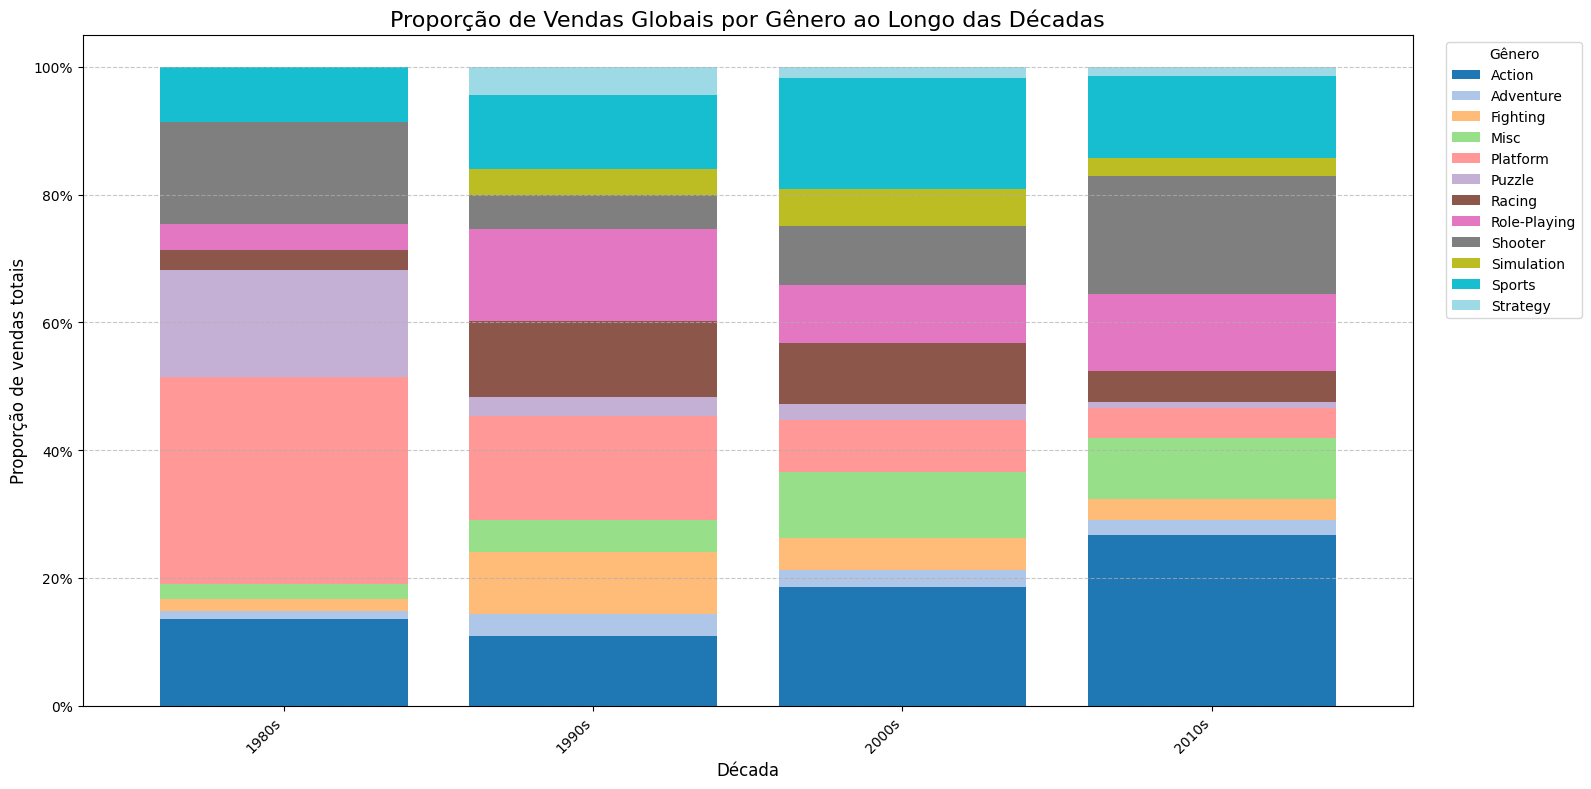

In [28]:
vendas_genero_decada = df.groupby(["Decade", "Genre"])["Global_Sales"].sum()

grid_genero_decada = vendas_genero_decada.unstack().fillna(0)

grid_genero_decada = grid_genero_decada.drop(index="2020s", errors="ignore")

#calculando proporção
total_decada = grid_genero_decada.sum(axis=1)

proporcao_decada = grid_genero_decada.div(total_decada, axis=0)

ax = proporcao_decada.plot(kind="bar",
                          stacked=True,
                          figsize=(16,8),
                          width=0.8,
                          colormap="tab20")

plt.title("Proporção de Vendas Globais por Gênero ao Longo das Décadas", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Proporção de vendas totais", fontsize=12)

#transformando eixo Y como porcentagem
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.legend(title="Gênero", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()





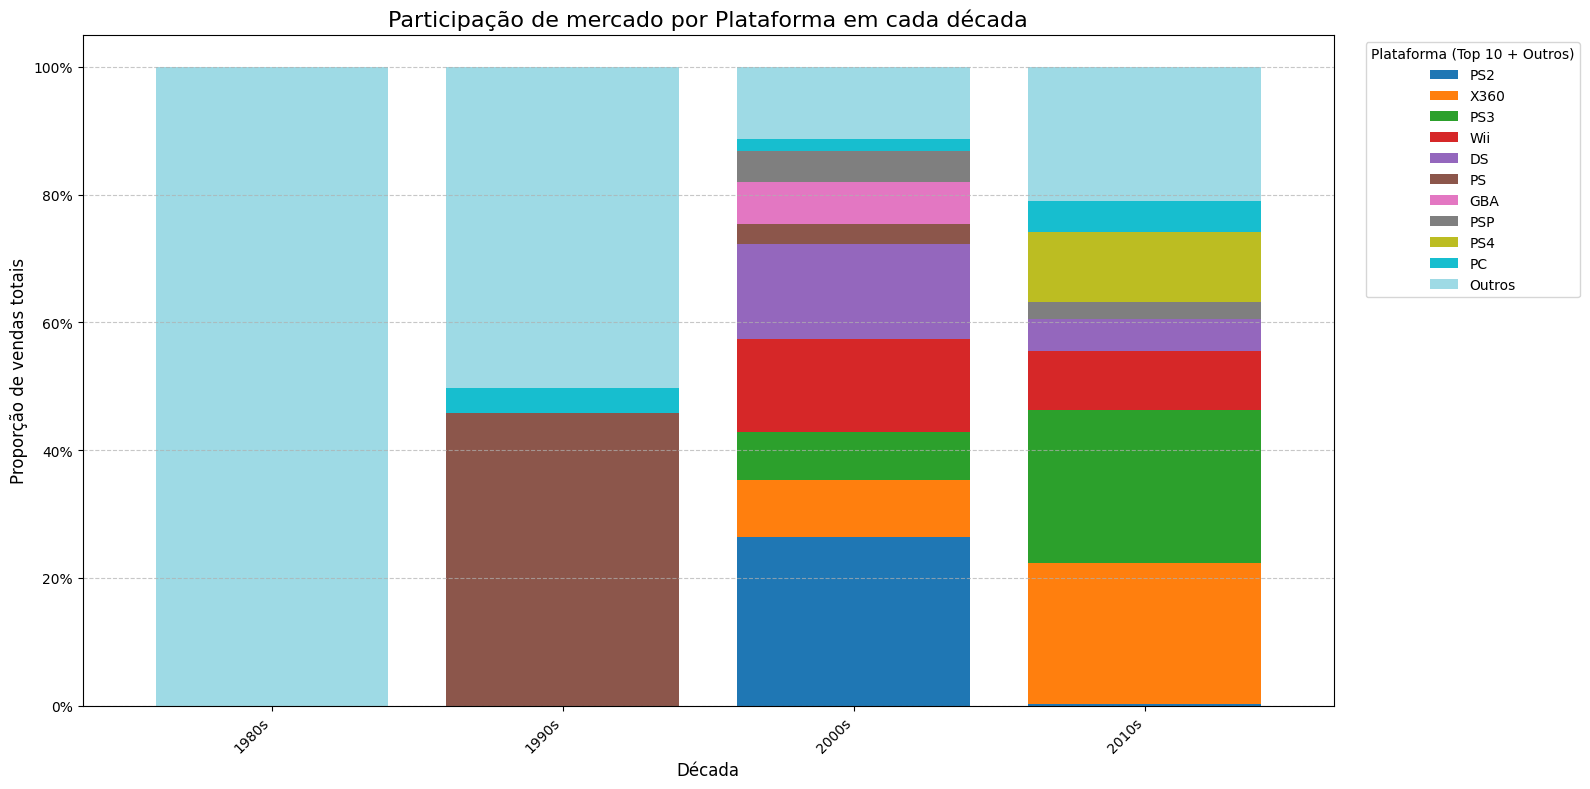

In [40]:
vendas_plataforma_decada = df.groupby(["Decade", "Platform"])["Global_Sales"].sum().unstack().fillna(0)

vendas_plataforma_decada = vendas_plataforma_decada.drop(index="2020s", errors="ignore")

top_10_plataformas = vendas_plataforma_decada.sum().sort_values(ascending=False).head(10).index

df_top_plataformas = vendas_plataforma_decada[top_10_plataformas].copy()

df_top_plataformas["Outros"] = vendas_plataforma_decada.drop(columns=top_10_plataformas).sum(axis=1)

total_decada = df_top_plataformas.sum(axis=1)

proporcao_decada = df_top_plataformas.div(total_decada, axis=0)

ax = proporcao_decada.plot(kind="bar",
                           stacked=True,
                           figsize=(16,8),
                           width=0.8,
                           colormap="tab20")

plt.title("Participação de mercado por Plataforma em cada década", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Proporção de vendas totais", fontsize=12)

ax.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.legend(title='Plataforma (Top 10 + Outros)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


* participação de mercado do gênero 'Plataforma' diminuiu com o passar das décadas, enquanto jogos do gênero 'Miscelânea' e 'Ação' aumentaram.

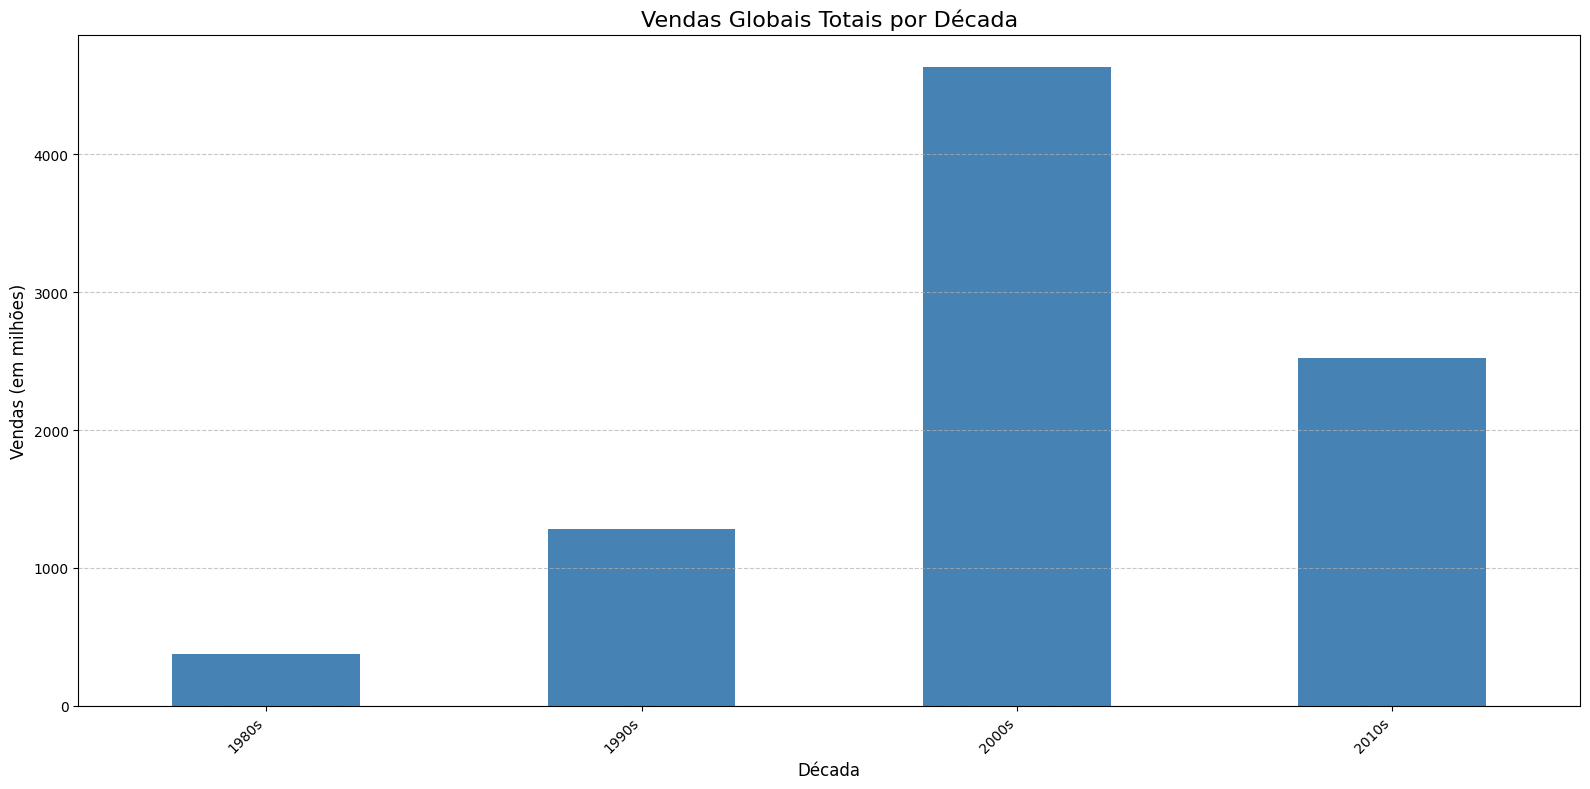

In [29]:
vendas_decada = df.groupby("Decade")["Global_Sales"].sum()

vendas_decada = vendas_decada.drop(index="2020s", errors="ignore")

vendas_decada = vendas_decada.sort_index()

ax = vendas_decada.plot(kind="bar",
                        figsize=(16,8),
                        color="steelblue")

plt.title("Vendas Globais Totais por Década", fontsize=16)
plt.xlabel("Década", fontsize=12)
plt.ylabel("Vendas (em milhões)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## Considerações finais

#

* O período mais expressivo de aumento de vendas de jogos ocorreu entre 2000 a 2010, com seu pico máximo em 2008. Naquela década ocorreram lançamentos de consoles como Playstation 2, Nintendo Wii e Nintendo DS que dominaram parte significativa do mercado.

* No geral, jogos do gênero 'Action' foram os que tiveram mais cópias vendidas globalmente. Sendo que na América do Norte, foi gênero mais bem vendido.

* O Japão representa um mercado único para jogos do gênero 'RPG', que superaram as vendas regionais na América do Norte e Europa.